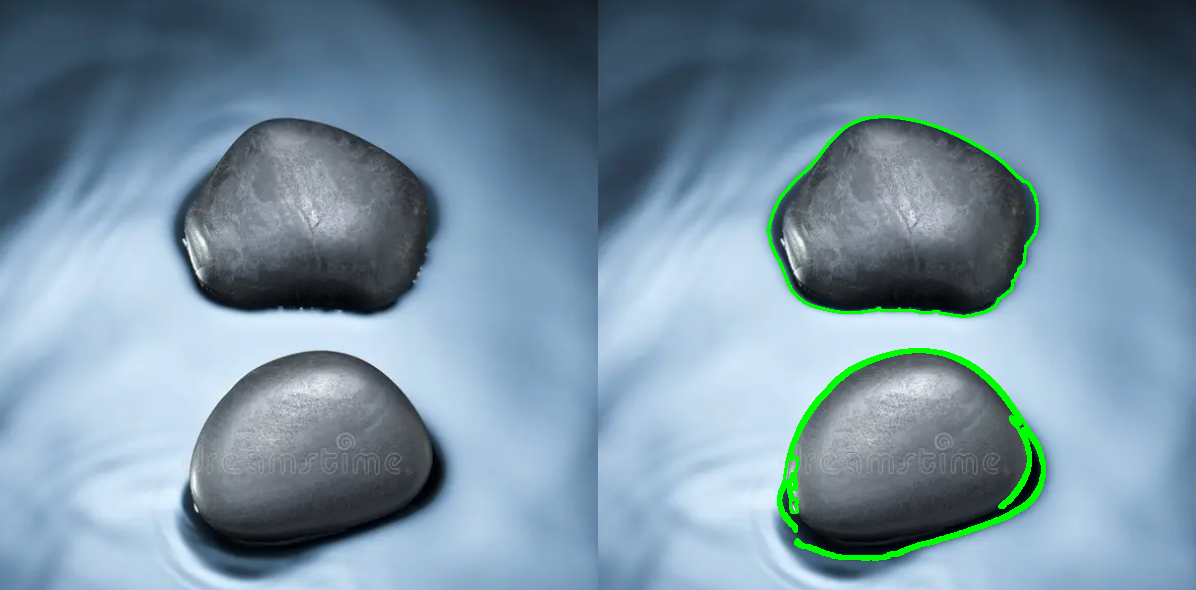

In [17]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Stones_in_water.png')
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(gray)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(enhanced, (7, 7), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 30, 150)

# Dilate the edges to connect broken contours
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)

# Find contours
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
result = image.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

# Filter contours by area
min_area = 1000  # Adjust this value based on your image
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw filtered contours
final_result = image.copy()
cv2.drawContours(final_result, filtered_contours, -1, (0, 255, 0), 2)

# Display results (for Google Colab)
from google.colab.patches import cv2_imshow

# Show original and result side by side
output = np.hstack([image, final_result])
cv2_imshow(output)

# Clean up
cv2.waitKey(0)
cv2.destroyAllWindows()